In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [ ]:
# Load datasets
users = pd.read_csv('/content/drive/MyDrive/Trek_Seeker_Data/New_Datasets/users.csv')
destinations = pd.read_csv('/content/drive/MyDrive/Trek_Seeker_Data/New_Datasets/destinations.csv')
interactions = pd.read_csv('/content/drive/MyDrive/Trek_Seeker_Data/New_Datasets/interactions.csv')

In [ ]:
users.head()

,User_ID,Age_Category,Gender,Nationality,Interests,Traveler_Category
0,1,18-24,Male,USA,"Art_Cultural, Religious",Solo
1,2,25-35,Female,UK,"Nature_Wildlife, Scenic_Viewpoints",Solo
2,3,36-45,Male,Canada,"Historical, Relaxation_Wellness, Religious",Group
3,4,46-60,Female,Australia,"Art_Cultural, Shopping_Local",Couple
4,5,18-24,Other,Germany,"Adventure_Hiking, Nature_Wildlife",Solo


In [ ]:
destinations.head()

,Destination_ID,Name,Description,Tags,City,Latitude,Longitude,Average_Rating
0,1,Galle Dutch Fort,"Built in the 16th century, this preserved Dutc...","Art_Cultural, Historical, Nature_Wildlife, Sce...",Galle,6.030464,80.212446,4.7
1,2,Galle Lighthouse,Historic lighthouse at a fort with simple styl...,"Historical, Scenic_Viewpoints",Galle,6.024567,80.216791,4.6
2,3,Galle Fort Clock Tower,Longstanding tower featuring a large clock fac...,"Historical, Scenic_Viewpoints",Galle,6.030034,80.212537,4.6
3,4,Maritime Museum,"Underwater artifacts, ship models & other mari...","Art_Cultural, Historical",Galle,6.030045,80.212537,4.2
4,5,Dutch Reformed Church,Small 18th-century structure with stained-glas...,"Art_Cultural, Historical, Religious",Galle,6.028201,79.912238,4.5


In [ ]:
interactions.head()

,UserID,DestinationID,UserRating
0,1,111,4.0
1,1,77,4.7
2,1,62,4.2
3,2,107,3.3
4,2,48,4.6


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User_ID            340 non-null    int64 
 1   Age_Category       340 non-null    object
 2   Gender             340 non-null    object
 3   Nationality        340 non-null    object
 4   Interests          340 non-null    object
 5   Traveler_Category  340 non-null    object
dtypes: int64(1), object(5)
memory usage: 16.1+ KB


In [ ]:
destinations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Destination_ID  131 non-null    int64  
 1   Name            131 non-null    object 
 2   Description     66 non-null     object 
 3   Tags            131 non-null    object 
 4   City            131 non-null    object 
 5   Latitude        131 non-null    float64
 6   Longitude       131 non-null    float64
 7   Average_Rating  131 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 8.3+ KB


In [ ]:
print("Shape of users dataset:", users.shape)
print("Shape of interactions dataset:", interactions.shape)

Shape of users dataset: (340, 6)
Shape of interactions dataset: (1883, 3)


In [ ]:
users.isnull().sum()

,0
User_ID,0
Age_Category,0
Gender,0
Nationality,0
Interests,0
Traveler_Category,0


In [ ]:
interactions.isnull().sum()

,0
UserID,0
DestinationID,0
UserRating,0


**EDA**

<ipython-input-8-fa698ba5dd2e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=users, x='Age_Category', palette='Set2')


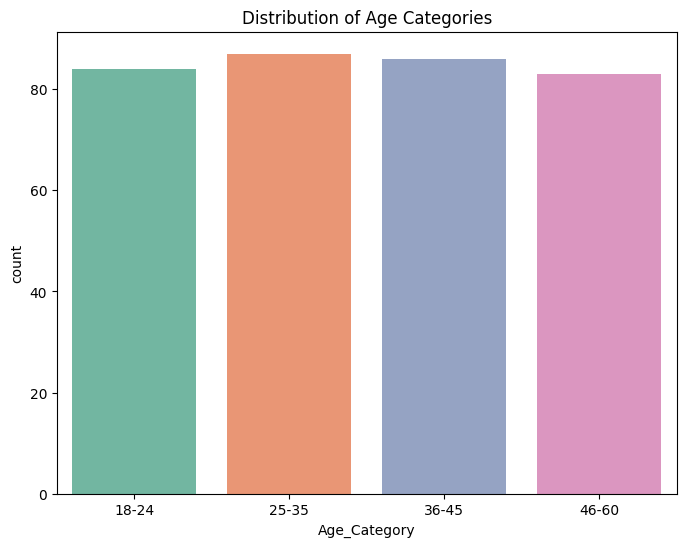

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=users, x='Age_Category', palette='Set2')
plt.title('Distribution of Age Categories')
plt.show()

<ipython-input-9-e5599000d171>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=users, x='Gender', palette='Set1')


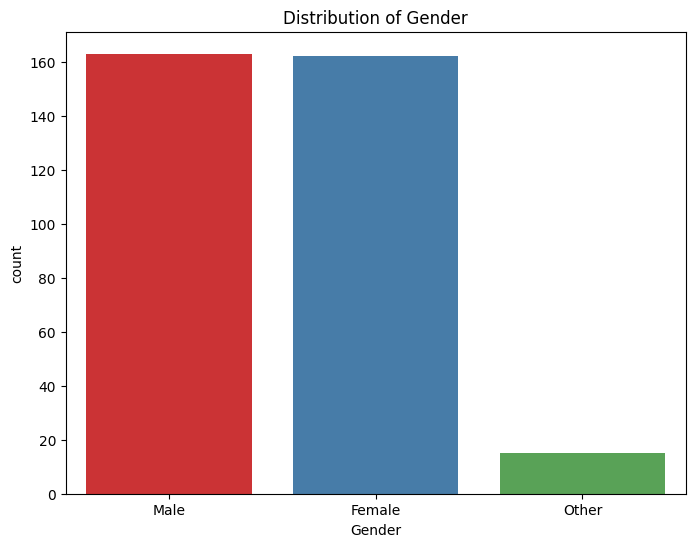

In [ ]:
# 4. Analyzing the distribution of Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=users, x='Gender', palette='Set1')
plt.title('Distribution of Gender')
plt.show()

In [ ]:
users['Interest_List'] = users['Interests'].str.split(', ')
interests_exploded = users.explode('Interest_List')

<ipython-input-11-646442a91413>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=interests_exploded, y='Interest_List', order=interests_exploded['Interest_List'].value_counts().index, palette='coolwarm')


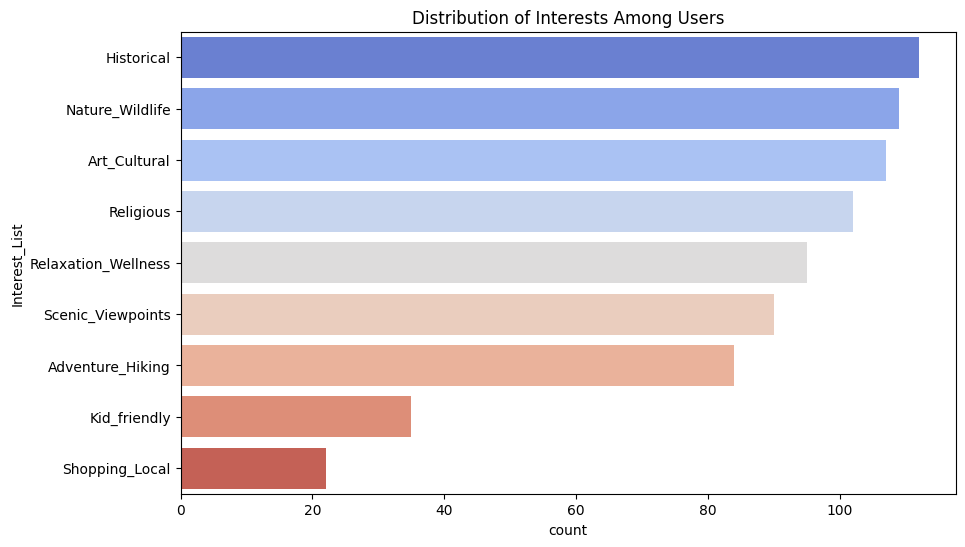

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=interests_exploded, y='Interest_List', order=interests_exploded['Interest_List'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Interests Among Users')
plt.show()

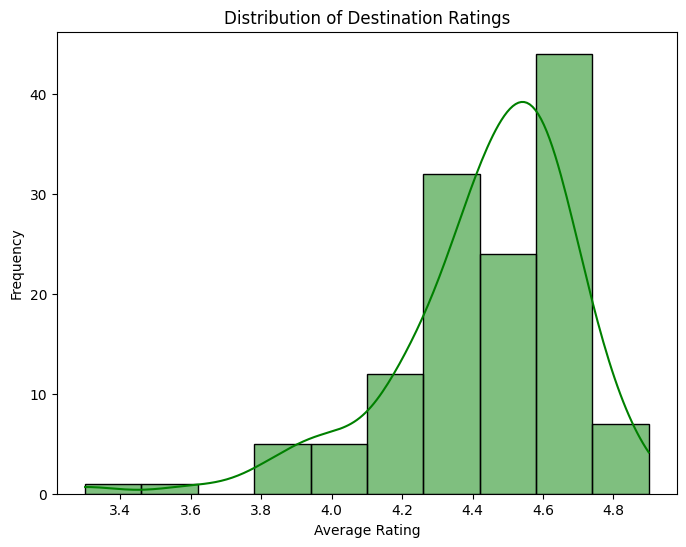

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(destinations['Average_Rating'], bins=10, kde=True, color='green')
plt.title('Distribution of Destination Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

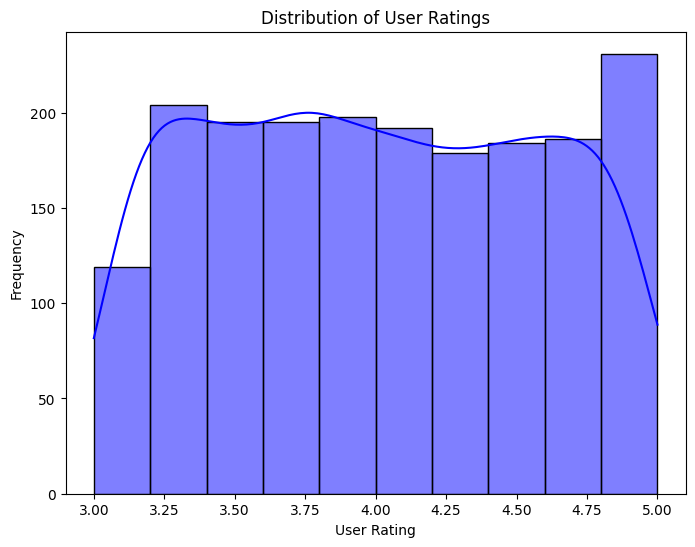

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(interactions['UserRating'], bins=10, kde=True, color='blue')
plt.title('Distribution of User Ratings')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.show()

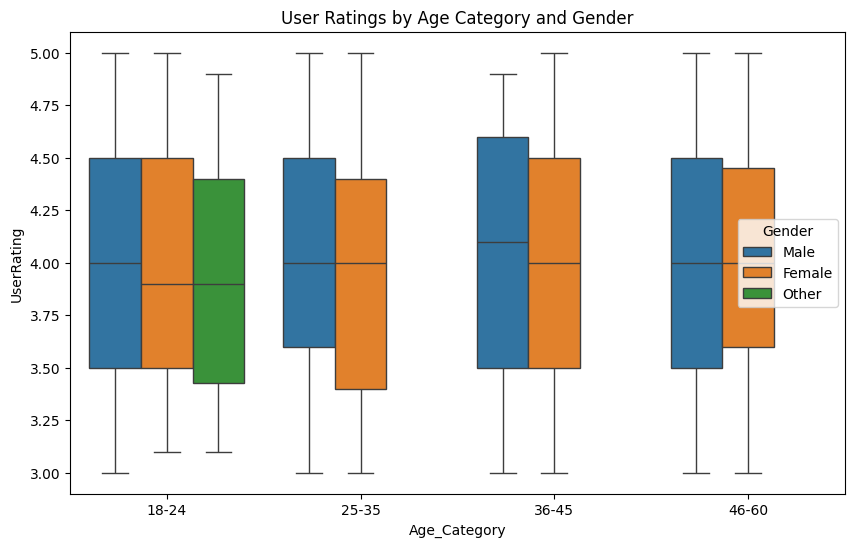

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=interactions.merge(users, left_on='UserID', right_on='User_ID'), x='Age_Category', y='UserRating', hue='Gender')
plt.title('User Ratings by Age Category and Gender')
plt.show()

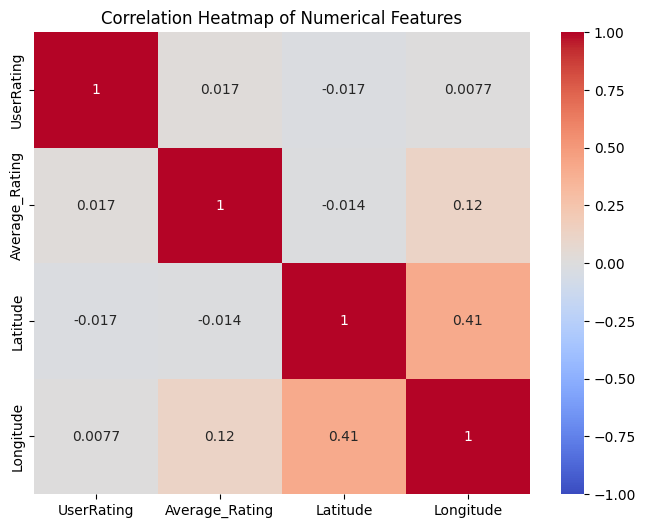

In [ ]:
# Importing necessary libraries for visualization
import numpy as np

# For numeric data correlation, merging the datasets for more features
merged_df = pd.merge(interactions, destinations, left_on='DestinationID', right_on='Destination_ID')

# Selecting numerical columns for correlation (UserRating, Average_Rating, Latitude, Longitude)
correlation_data = merged_df[['UserRating', 'Average_Rating', 'Latitude', 'Longitude']]

# Calculating the correlation matrix
correlation_matrix = correlation_data.corr()

# Creating a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


**DUPLICATE ROW CHECK**

In [ ]:
print("Duplicate rows user dataset: ",users.duplicated().sum())
print("Duplicate rows interaction dataset: ", interactions.duplicated().sum())

Duplicate rows user dataset:  0
Duplicate rows interaction dataset:  0


In [ ]:
users.columns

Index(['User_ID', 'Age_Category', 'Gender', 'Nationality', 'Interests',
       'Traveler_Category'],
      dtype='object')

In [ ]:
destinations.columns

Index(['Destination_ID', 'Name', 'Description', 'Tags', 'City', 'Latitude',
       'Longitude', 'Average_Rating'],
      dtype='object')

In [ ]:
interactions.columns

Index(['UserID', 'DestinationID', 'UserRating'], dtype='object')

In [ ]:
destinations.drop(['Latitude', 'Longitude','Description'], axis = 1, inplace=True)
destinations.head()

,Destination_ID,Name,Tags,City,Average_Rating
0,1,Galle Dutch Fort,"Art_Cultural, Historical, Nature_Wildlife, Sce...",Galle,4.7
1,2,Galle Lighthouse,"Historical, Scenic_Viewpoints",Galle,4.6
2,3,Galle Fort Clock Tower,"Historical, Scenic_Viewpoints",Galle,4.6
3,4,Maritime Museum,"Art_Cultural, Historical",Galle,4.2
4,5,Dutch Reformed Church,"Art_Cultural, Historical, Religious",Galle,4.5


**DATA PREPROCESSING**

In [ ]:
# Encoding Age_Category, Gender, Nationality, and Traveler_Category
label_encoders = {}
for column in ['Age_Category', 'Gender', 'Nationality', 'Traveler_Category']:
    le = LabelEncoder()
    users[column] = le.fit_transform(users[column])
    label_encoders[column] = le

In [ ]:
users.head()

,User_ID,Age_Category,Gender,Nationality,Interests,Traveler_Category
0,1,0,1,10,"Art_Cultural, Religious",2
1,2,1,0,9,"Nature_Wildlife, Scenic_Viewpoints",2
2,3,2,1,1,"Historical, Relaxation_Wellness, Religious",1
3,4,3,0,0,"Art_Cultural, Shopping_Local",0
4,5,0,2,3,"Adventure_Hiking, Nature_Wildlife",2


In [ ]:
# Mapping
for column, le in label_encoders.items():
    print(f"Column: {column}")
    print(f"Classes: {le.classes_}")
    print(f"Mapping: {dict(enumerate(le.classes_))}")
    print()

Column: Age_Category
Classes: ['18-24' '25-35' '36-45' '46-60']
Mapping: {0: '18-24', 1: '25-35', 2: '36-45', 3: '46-60'}

Column: Gender
Classes: ['Female' 'Male' 'Other']
Mapping: {0: 'Female', 1: 'Male', 2: 'Other'}

Column: Nationality
Classes: ['Australia' 'Canada' 'France' 'Germany' 'India' 'Italy' 'Japan'
 'South Africa' 'Sri Lanka' 'UK' 'USA']
Mapping: {0: 'Australia', 1: 'Canada', 2: 'France', 3: 'Germany', 4: 'India', 5: 'Italy', 6: 'Japan', 7: 'South Africa', 8: 'Sri Lanka', 9: 'UK', 10: 'USA'}

Column: Traveler_Category
Classes: ['Couple' 'Group' 'Solo']
Mapping: {0: 'Couple', 1: 'Group', 2: 'Solo'}



In [ ]:
# Multi-hot encoding of Interests
mlb = MultiLabelBinarizer()
users = users.join(pd.DataFrame(mlb.fit_transform(users.pop('Interests').str.split(', ')),
                                columns=mlb.classes_, index=users.index))

In [ ]:
users.head()

,User_ID,Age_Category,Gender,Nationality,Traveler_Category,Adventure_Hiking,Art_Cultural,Historical,Kid_friendly,Nature_Wildlife,Relaxation_Wellness,Religious,Scenic_Viewpoints,Shopping_Local
0,1,0,1,10,2,0,1,0,0,0,0,1,0,0
1,2,1,0,9,2,0,0,0,0,1,0,0,1,0
2,3,2,1,1,1,0,0,1,0,0,1,1,0,0
3,4,3,0,0,0,0,1,0,0,0,0,0,0,1
4,5,0,2,3,2,1,0,0,0,1,0,0,0,0


**MODEL TRAINING**

In [ ]:
# Train KNN Model
X = users.drop(columns=['User_ID'])
knn = NearestNeighbors(n_neighbors=5, metric='cosine')
knn.fit(X)

NearestNeighbors(metric='cosine')

In [ ]:
# Further match and filter collaborative recommendations
def calculate_interest_score(destination_tags, input_interests):
    destination_tags_set = set(destination_tags.split(', '))
    input_interests_set = set(input_interests.split(', '))

    # Intersection of input interests and destination tags
    match_count = len(destination_tags_set.intersection(input_interests_set))
    return match_count

In [ ]:
def get_similar_users_and_destinations(model, age_category, gender, nationality, traveler_category, interests):
    # Encode the inputs
    encoded_input = {
        'Age_Category': label_encoders['Age_Category'].transform([age_category])[0],
        'Gender': label_encoders['Gender'].transform([gender])[0],
        'Nationality': label_encoders['Nationality'].transform([nationality])[0],
        'Traveler_Category': label_encoders['Traveler_Category'].transform([traveler_category])[0],
    }
    interests_vector = mlb.transform([interests.split(', ')])[0]

    # Combine the encoded inputs into a single array
    input_vector = [encoded_input['Age_Category'], encoded_input['Gender'],
                    encoded_input['Nationality'], encoded_input['Traveler_Category']]

    # Apply a higher weight to the interests vector
    weighted_interests_vector = interests_vector * 3  # Adjust weight based on importance
    input_vector.extend(weighted_interests_vector)

    # Find the top 5 similar users using the passed model
    distances, indices = model.kneighbors([input_vector])
    similar_users = users.iloc[indices[0]]
    similar_user_ids = similar_users['User_ID'].values

    # Retrieve the destinations visited by these similar users
    similar_destinations = interactions[interactions['UserID'].isin(similar_user_ids)]['DestinationID'].unique()
    result_destinations = destinations[destinations['Destination_ID'].isin(similar_destinations)]

    # Calculate an interest score for each destination based on input interests
    result_destinations['Interest_Score'] = result_destinations['Tags'].apply(lambda x: calculate_interest_score(x, interests))

    # Sort the destinations by the interest score
    result_destinations = result_destinations.sort_values(by='Interest_Score', ascending=False)

    return similar_users, result_destinations


In [ ]:
def test_function():
    age_category = input("Enter Age Category (18-24, 25-35, 36-45, 46-60): ")
    gender = input("Enter Gender (Male, Female, Other): ")
    nationality = input("Enter Nationality: ")
    traveler_category = input("Enter Traveler Category (Solo, Group, Couple): ")
    interests = input("Enter Interests (comma-separated): ")

    # Similar users and destinations
    similar_users, result_destinations = get_similar_users_and_destinations(knn, age_category, gender, nationality, traveler_category, interests)

    print("Top 5 Similar Users:")
    print(similar_users[['User_ID', 'Age_Category', 'Gender', 'Nationality', 'Traveler_Category']])

    print("\nRecommended Destinations:")
    print(result_destinations[['Name', 'Interest_Score']])


In [ ]:
test_function()

KeyboardInterrupt: Interrupted by user

**Check neighours distance**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split data
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

knn = NearestNeighbors(n_neighbors=5, metric='cosine')

# Fit model
knn.fit(X_train)

# Distance using test set
distances, indices = knn.kneighbors(X_test)

print("Nearest Neighbors (Indices) and Distances:")
for i, (dist, idx) in enumerate(zip(distances, indices)):
    print(f"\nTest Sample {i}:")
    for d, id in zip(dist, idx):
        print(f"Neighbor Index: {id}, Distance: {d}")

Nearest Neighbors (Indices) and Distances:

Test Sample 0:
Neighbor Index: 252, Distance: 0.010616067464597423
Neighbor Index: 161, Distance: 0.013942822471492589
Neighbor Index: 104, Distance: 0.013986702816730534
Neighbor Index: 41, Distance: 0.01851851851851849
Neighbor Index: 198, Distance: 0.018693237074683733

Test Sample 1:
Neighbor Index: 11, Distance: 0.0
Neighbor Index: 131, Distance: 0.005684930745772476
Neighbor Index: 152, Distance: 0.007380174665517436
Neighbor Index: 194, Distance: 0.0074907421763404924
Neighbor Index: 149, Distance: 0.012907530545085755

Test Sample 2:
Neighbor Index: 271, Distance: 0.005808374398079907
Neighbor Index: 75, Distance: 0.00784325835077837
Neighbor Index: 80, Distance: 0.00784325835077837
Neighbor Index: 152, Distance: 0.011489321582949241
Neighbor Index: 109, Distance: 0.01673970647189582

Test Sample 3:
Neighbor Index: 154, Distance: 0.023812939816047374
Neighbor Index: 138, Distance: 0.045136289367769034
Neighbor Index: 184, Distance: 0.

**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import make_scorer, silhouette_score
import numpy as np

# Param grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

nn = NearestNeighbors()

def silhouette_scorer(estimator, X):
    distances, _ = estimator.kneighbors(X)
    return silhouette_score(X, distances.mean(axis=1))

# Perform Grid Search
grid_search = GridSearchCV(nn, param_grid, cv=5, scoring=make_scorer(silhouette_scorer, greater_is_better=True), n_jobs=-1)
grid_search.fit(X)

# Get the best parameters and model
best_nn = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best Parameters: {best_params}")

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [ ]:
best_nn_model = grid_search.best_estimator_
best_nn_model

NearestNeighbors(metric='euclidean', n_neighbors=3)

In [ ]:
def test_function():
    age_category = input("Enter Age Category (18-24, 25-35, 36-45, 46-60): ")
    gender = input("Enter Gender (Male, Female, Other): ")
    nationality = input("Enter Nationality: ")
    traveler_category = input("Enter Traveler Category (Solo, Group, Couple): ")
    interests = input("Enter Interests (comma-separated): ")

    # Similar users and destinations
    similar_users, result_destinations = get_similar_users_and_destinations(best_nn_model, age_category, gender, nationality, traveler_category, interests)

    print("Top 5 Similar Users:")
    print(similar_users[['User_ID', 'Age_Category', 'Gender', 'Nationality', 'Traveler_Category']])

    print("\nRecommended Destinations:")
    print(result_destinations[['Name', 'Interest_Score']])


In [ ]:
test_function()

Enter Age Category (18-24, 25-35, 36-45, 46-60): 18-24
Enter Gender (Male, Female, Other): Male
Enter Nationality: UK
Enter Traveler Category (Solo, Group, Couple): Solo
Enter Interests (comma-separated): Historical
Top 5 Similar Users:
     User_ID  Age_Category  Gender  Nationality  Traveler_Category
285      286             1       1            9                  2
53        54             1       1            9                  1
157      158             1       0            9                  2

Recommended Destinations:
                                          Name  Interest_Score
0                             Galle Dutch Fort               1
1                             Galle Lighthouse               1
117                  British Garrison Cemetery               1
93                   Malwatu Chapter Monastery               1
92   Kandyan Art Association & Cultural Centre               1
91                           Ceylon Tea Museum               1
81             Sri Ponnamba

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
<ipython-input-24-9a2bc1c690b4>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_destinations['Interest_Score'] = result_destinations['Tags'].apply(lambda x: calculate_interest_score(x, interests))


**CONTENT BASED FILTERING**

In [ ]:
def independent_content_based_filtering(interests, destinations):
    # Calculate interest score
    destinations['Interest_Score'] = destinations['Tags'].apply(lambda x: calculate_interest_score(x, interests))

    # Sort in descending order
    sorted_destinations = destinations.sort_values(by='Interest_Score', ascending=False)

    # print("Independent Content-Based Filtering Results:")
    # print(sorted_destinations[['Name', 'Interest_Score']])

    return sorted_destinations


**Combined weighted results**

In [ ]:
def combine_and_weight_recommendations(collab_destinations, independent_destinations, weight_collab=0.3, weight_independent=0.7):

    collab_destinations = collab_destinations[['Destination_ID', 'Interest_Score']]
    independent_destinations = independent_destinations[['Destination_ID', 'Interest_Score']]

    # Combine
    combined_destinations = pd.merge(collab_destinations, independent_destinations, on='Destination_ID', how='outer', suffixes=('_collab', '_independent'))

    # Fill NaN with 0
    combined_destinations['Interest_Score_collab'].fillna(0, inplace=True)
    combined_destinations['Interest_Score_independent'].fillna(0, inplace=True)

    # Weighted score calculation
    combined_destinations['Weighted_Score'] = (combined_destinations['Interest_Score_collab'] * weight_collab +
                                               combined_destinations['Interest_Score_independent'] * weight_independent)

    # Sort descending weighted score
    top_recommendations = combined_destinations.sort_values(by='Weighted_Score', ascending=False)

    # Fetch names
    top_recommendations = top_recommendations.merge(destinations[['Destination_ID', 'Name']], on='Destination_ID')

    top_recommendations = top_recommendations.head(30)

    # print("Combined and Weighted Recommendations:")
    # print(top_recommendations[['Name', 'Weighted_Score']])

    return top_recommendations


In [ ]:
def test_combined_function():
    age_category = input("Enter Age Category (18-24, 25-35, 36-45, 46-60): ")
    gender = input("Enter Gender (Male, Female, Other): ")
    nationality = input("Enter Nationality: ")
    traveler_category = input("Enter Traveler Category (Solo, Group, Couple): ")
    interests = input("Enter Interests (comma-separated): ")

    # Collaborative and content-based filtering
    similar_users, collab_content_based_destinations = get_similar_users_and_destinations(best_nn_model, age_category, gender, nationality, traveler_category, interests)
    print("\nSimilar Users:")
    print(similar_users[['User_ID', 'Age_Category', 'Gender', 'Nationality', 'Traveler_Category']])

    # print("\n Collaborative results")
    # print(collab_content_based_destinations[['Name', 'Interest_Score']])

    independent_content_based_destinations = independent_content_based_filtering(interests, destinations)

    # Weighted recommendations
    top_recommendations = combine_and_weight_recommendations(collab_content_based_destinations, independent_content_based_destinations)

    # Display top recommendations
    print("\nTop Recommendations:")
    print(top_recommendations[['Name', 'Weighted_Score']])

In [ ]:
test_combined_function()

Enter Age Category (18-24, 25-35, 36-45, 46-60): 25-35
Enter Gender (Male, Female, Other): Male
Enter Nationality: UK
Enter Traveler Category (Solo, Group, Couple): Solo
Enter Interests (comma-separated): Historical,Scenic

Similar Users:
     User_ID  Age_Category  Gender  Nationality  Traveler_Category
157      158             1       0            9                  2
177      178             1       1           10                  2
53        54             1       1            9                  1

Top Recommendations:
                                            Name  Weighted_Score
0                               Galle Dutch Fort             0.0
1              Japanese Peace Pagoda - Rumassala             0.0
2         Sea Turtle Hatchery Centre, Mahamodara             0.0
3                                   Jungle Beach             0.0
4   Galle Fort Attractions and Jumpers Sri Lanka             0.0
5                          National Museum Galle             0.0
6              M

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:900: UserWarning: unknown class(es) ['Historical,Scenic'] will be ignored
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
<ipython-input-24-9a2bc1c690b4>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_destinations['Interest_Score'] = result_destinations['Tags'].apply(lambda x: calculate_interest_score(x, interests))


In [ ]:
import pickle

In [ ]:
pickle.dump(best_nn_model, open('/content/drive/MyDrive/Trek_Seeker_Data/New_Datasets/knn_model_tuned.pkl', 'wb'))
pickle.dump(label_encoders, open('/content/drive/MyDrive/Trek_Seeker_Data/New_Datasets/label_encoders.pkl', 'wb'))
pickle.dump(mlb, open('/content/drive/MyDrive/Trek_Seeker_Data/New_Datasets/mlb.pkl', 'wb'))

In [ ]:
import sklearn
print(sklearn.__version__)

1.3.2


In [ ]:
!pip freeze > requirements.txt

In [ ]:
from joblib import dump, load

# Save the model
dump(best_nn_model, '/content/drive/MyDrive/Trek_Seeker_Data/New_Datasets/knn_model.joblib')


['/content/drive/MyDrive/Trek_Seeker_Data/New_Datasets/knn_model.joblib']